In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [49]:
data["Class"].value_counts()  # This dataset is highly unbalanced

Class
0    284315
1       492
Name: count, dtype: int64

In [50]:
# separating the data for analysis
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [51]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [52]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [53]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [54]:
# compare the values for both transactions
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [55]:
legit_sample =legit.sample(n=492)

In [57]:
data=pd.concat([legit_sample,fraud],axis=0)

In [58]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264876,161635.0,-1.042437,-1.502482,0.163939,-0.460260,-0.488177,0.233567,1.247327,0.015091,0.727813,...,0.656634,1.142560,1.193102,0.591115,-1.094987,-0.133796,0.125830,0.332908,439.10,0
143993,85782.0,1.072550,-0.108377,0.385924,0.569751,-0.469908,-0.380412,-0.098717,0.124727,-0.009635,...,-0.100877,-0.470713,0.100789,0.187167,0.114485,0.173546,-0.042066,0.008399,49.99,0
87248,61600.0,-0.762073,-3.542133,0.058367,0.974639,-1.734559,1.241091,0.320794,0.269805,0.837678,...,0.444737,-0.615781,-0.702926,-0.182934,-0.405483,0.853050,-0.185248,0.162542,959.06,0
118555,75125.0,0.824879,-0.543307,1.163464,1.390929,-1.024663,0.429259,-0.643908,0.369075,0.591516,...,0.279161,0.641504,-0.142795,0.216499,0.292635,-0.252136,0.050112,0.043657,130.00,0
1019,769.0,1.293730,0.649219,-0.928314,0.618256,0.784614,-0.487383,0.374360,-0.175528,-0.245819,...,-0.171402,-0.354259,-0.168067,-0.854451,0.639476,0.447704,-0.009582,0.032835,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [59]:
data["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

# basic checks

In [60]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264876,161635.0,-1.042437,-1.502482,0.163939,-0.460260,-0.488177,0.233567,1.247327,0.015091,0.727813,...,0.656634,1.142560,1.193102,0.591115,-1.094987,-0.133796,0.125830,0.332908,439.10,0
143993,85782.0,1.072550,-0.108377,0.385924,0.569751,-0.469908,-0.380412,-0.098717,0.124727,-0.009635,...,-0.100877,-0.470713,0.100789,0.187167,0.114485,0.173546,-0.042066,0.008399,49.99,0
87248,61600.0,-0.762073,-3.542133,0.058367,0.974639,-1.734559,1.241091,0.320794,0.269805,0.837678,...,0.444737,-0.615781,-0.702926,-0.182934,-0.405483,0.853050,-0.185248,0.162542,959.06,0
118555,75125.0,0.824879,-0.543307,1.163464,1.390929,-1.024663,0.429259,-0.643908,0.369075,0.591516,...,0.279161,0.641504,-0.142795,0.216499,0.292635,-0.252136,0.050112,0.043657,130.00,0
1019,769.0,1.293730,0.649219,-0.928314,0.618256,0.784614,-0.487383,0.374360,-0.175528,-0.245819,...,-0.171402,-0.354259,-0.168067,-0.854451,0.639476,0.447704,-0.009582,0.032835,0.76,0


In [61]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [62]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [63]:
data.shape

(984, 31)

In [64]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88795.852642,-2.325222,1.837218,-3.479169,2.272959,-1.543235,-0.679035,-2.820186,0.255348,-1.303879,...,0.330574,0.028642,-0.015234,-0.054763,0.006002,0.015812,0.084220,0.034531,96.003323,0.500000
std,48410.956023,5.508014,3.632619,6.236331,3.226121,4.210789,1.760817,5.837039,4.958800,2.333479,...,2.829881,1.177529,1.155410,0.561586,0.682262,0.489419,1.021413,0.431951,210.390115,0.500254
min,406.000000,-30.552380,-8.402154,-31.103685,-4.055570,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.091157,-4.781606,-1.380052,-7.263482,-3.310366,0.000000,0.000000
25%,46693.750000,-2.840568,-0.161069,-5.084967,-0.210430,-1.757468,-1.549560,-3.060742,-0.193647,-2.298358,...,-0.160628,-0.521657,-0.236446,-0.408988,-0.322022,-0.297180,-0.062466,-0.058262,1.100000,0.000000
50%,81371.000000,-0.701193,0.958496,-1.304683,1.375918,-0.441488,-0.672745,-0.727187,0.162529,-0.756709,...,0.158182,0.041830,-0.031389,0.015135,0.039455,-0.027163,0.056114,0.035824,17.990000,0.500000
75%,135498.500000,1.074294,2.793742,0.317276,4.289110,0.518063,0.138483,0.254430,0.855025,0.173418,...,0.642184,0.607713,0.182728,0.364697,0.386652,0.319798,0.452145,0.217094,99.990000,1.000000
max,172049.000000,2.370852,22.057729,3.170090,12.114672,11.095089,7.224100,5.802537,20.007208,6.778615,...,27.202839,8.361985,5.466230,1.215853,2.208209,2.745261,3.052358,1.999108,2125.870000,1.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 264876 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22 

In [66]:
#EDA

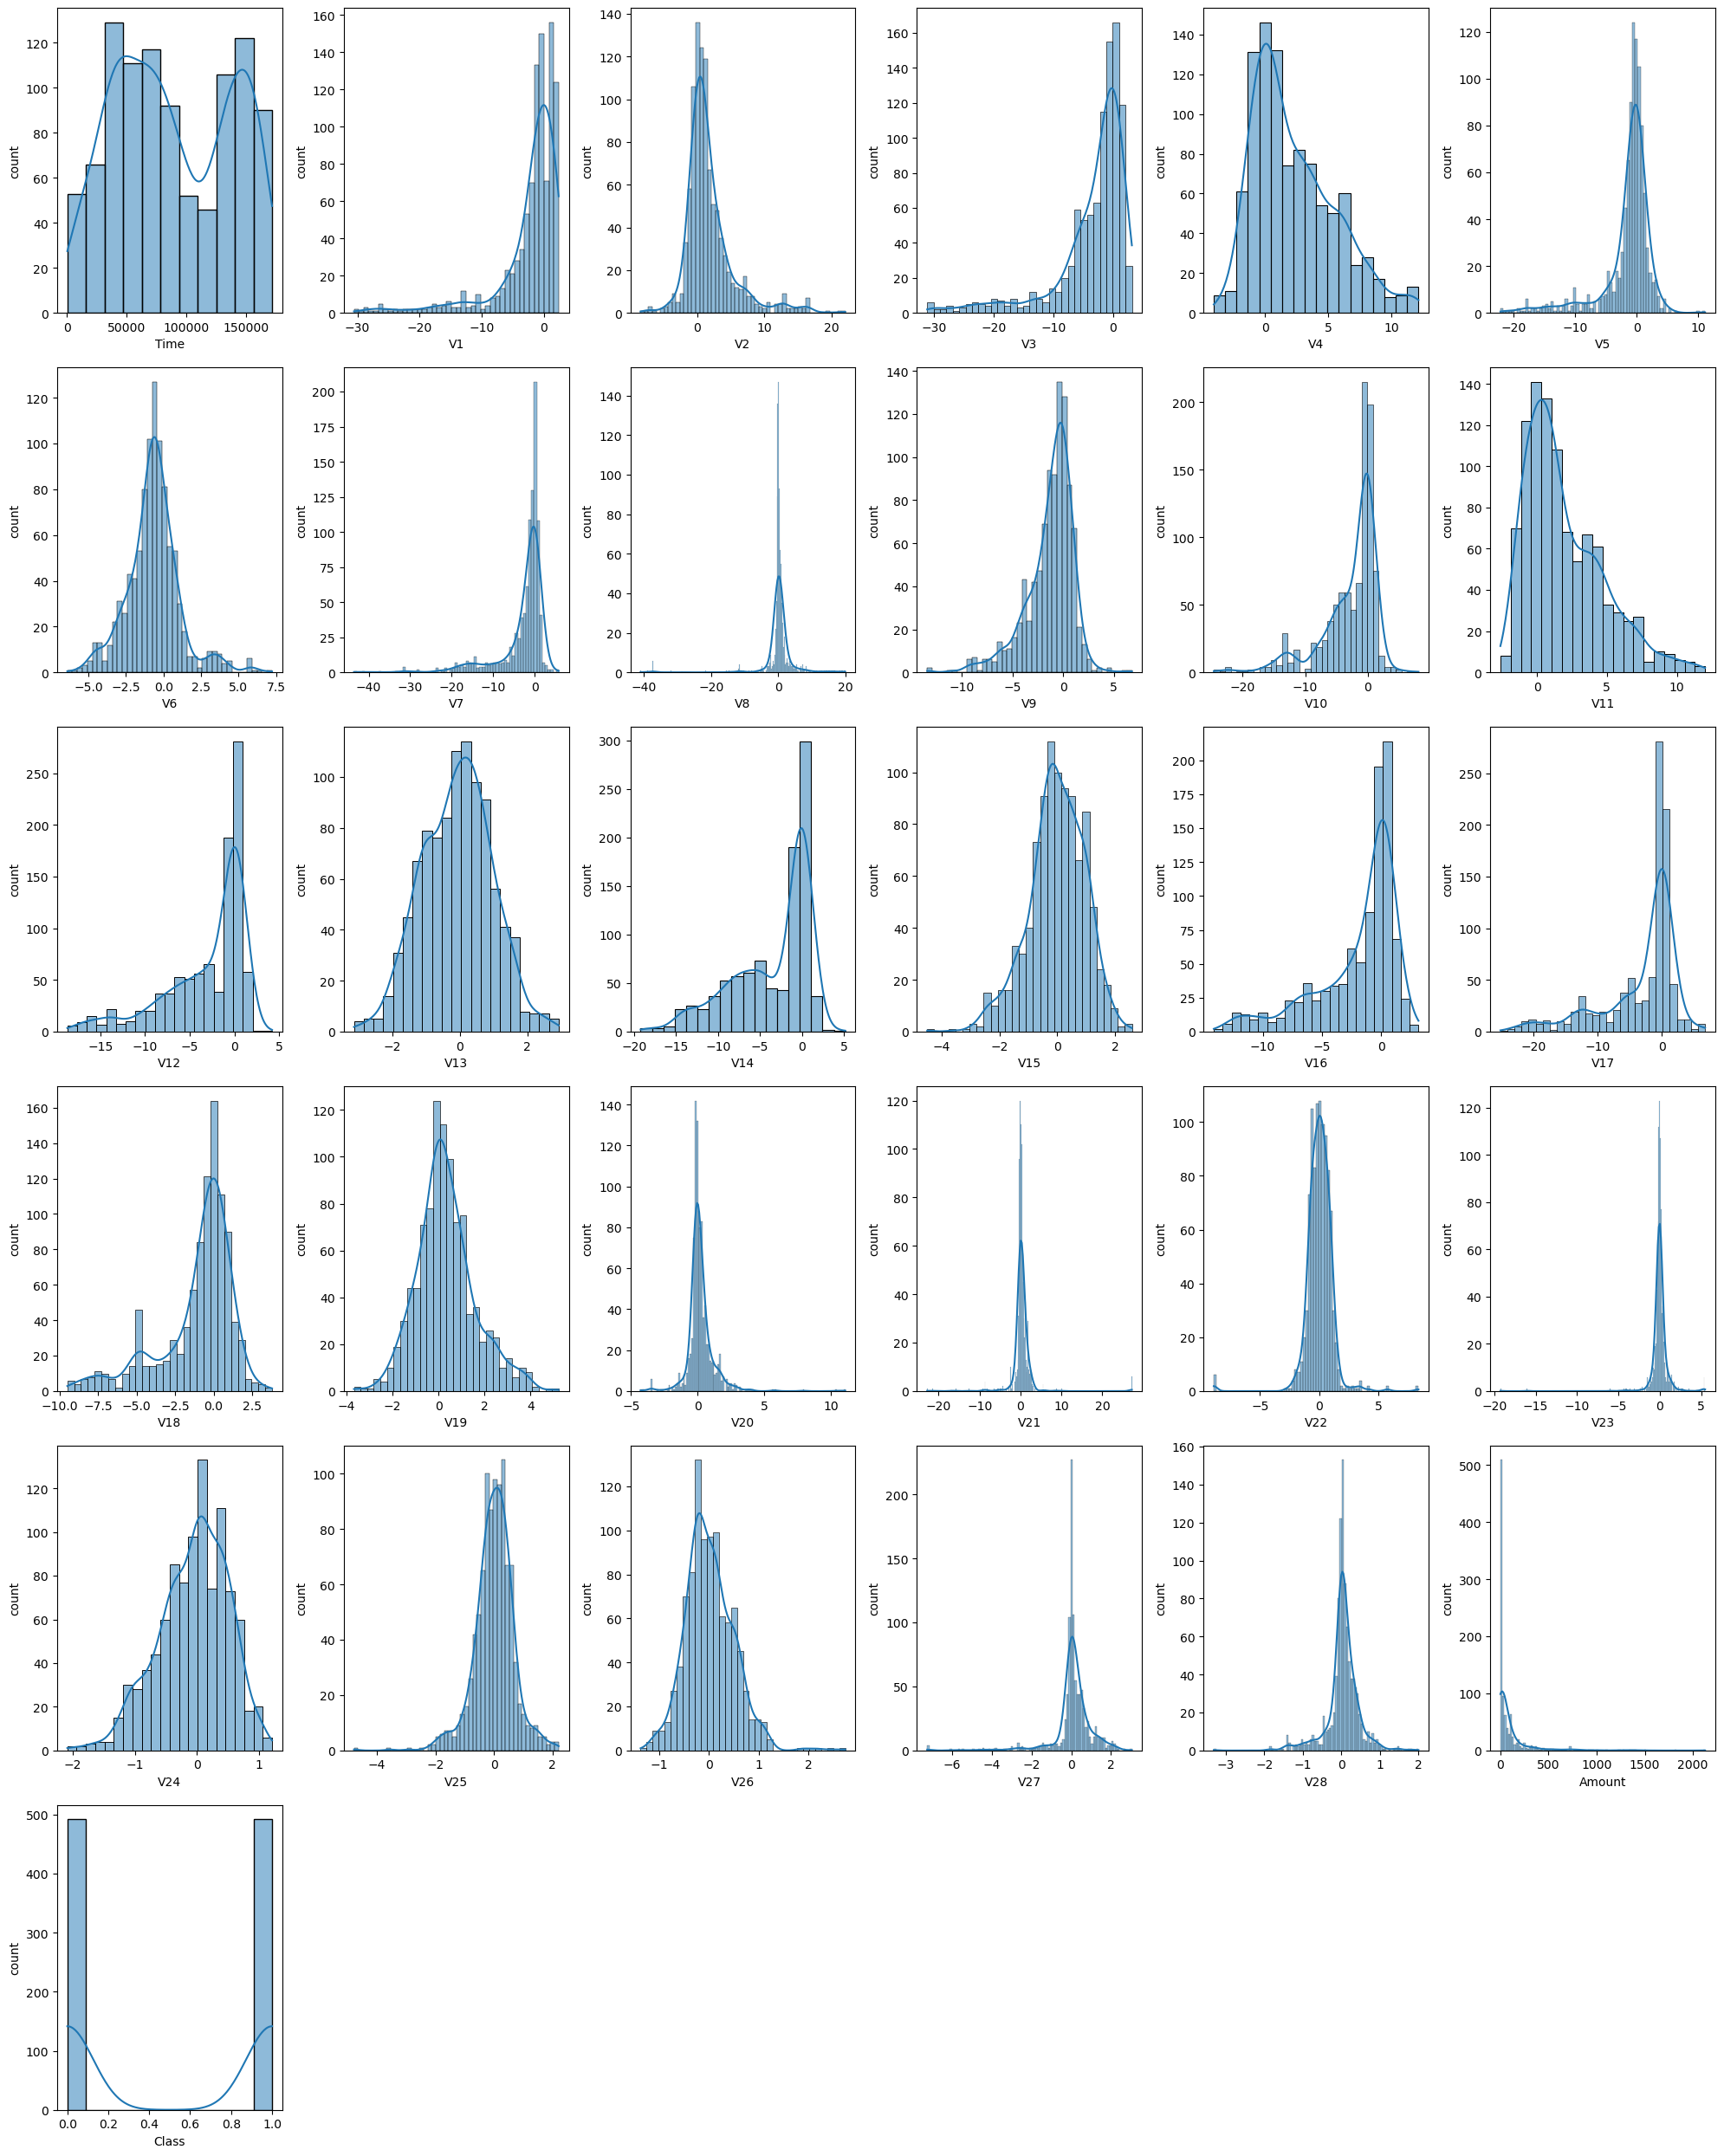

In [67]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=31:
        ax=plt.subplot(6,6,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()    

In [68]:
# data preprocessing

In [69]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87248,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118555,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1019,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
280143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
280149,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
281144,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [71]:
data.duplicated().sum()

19

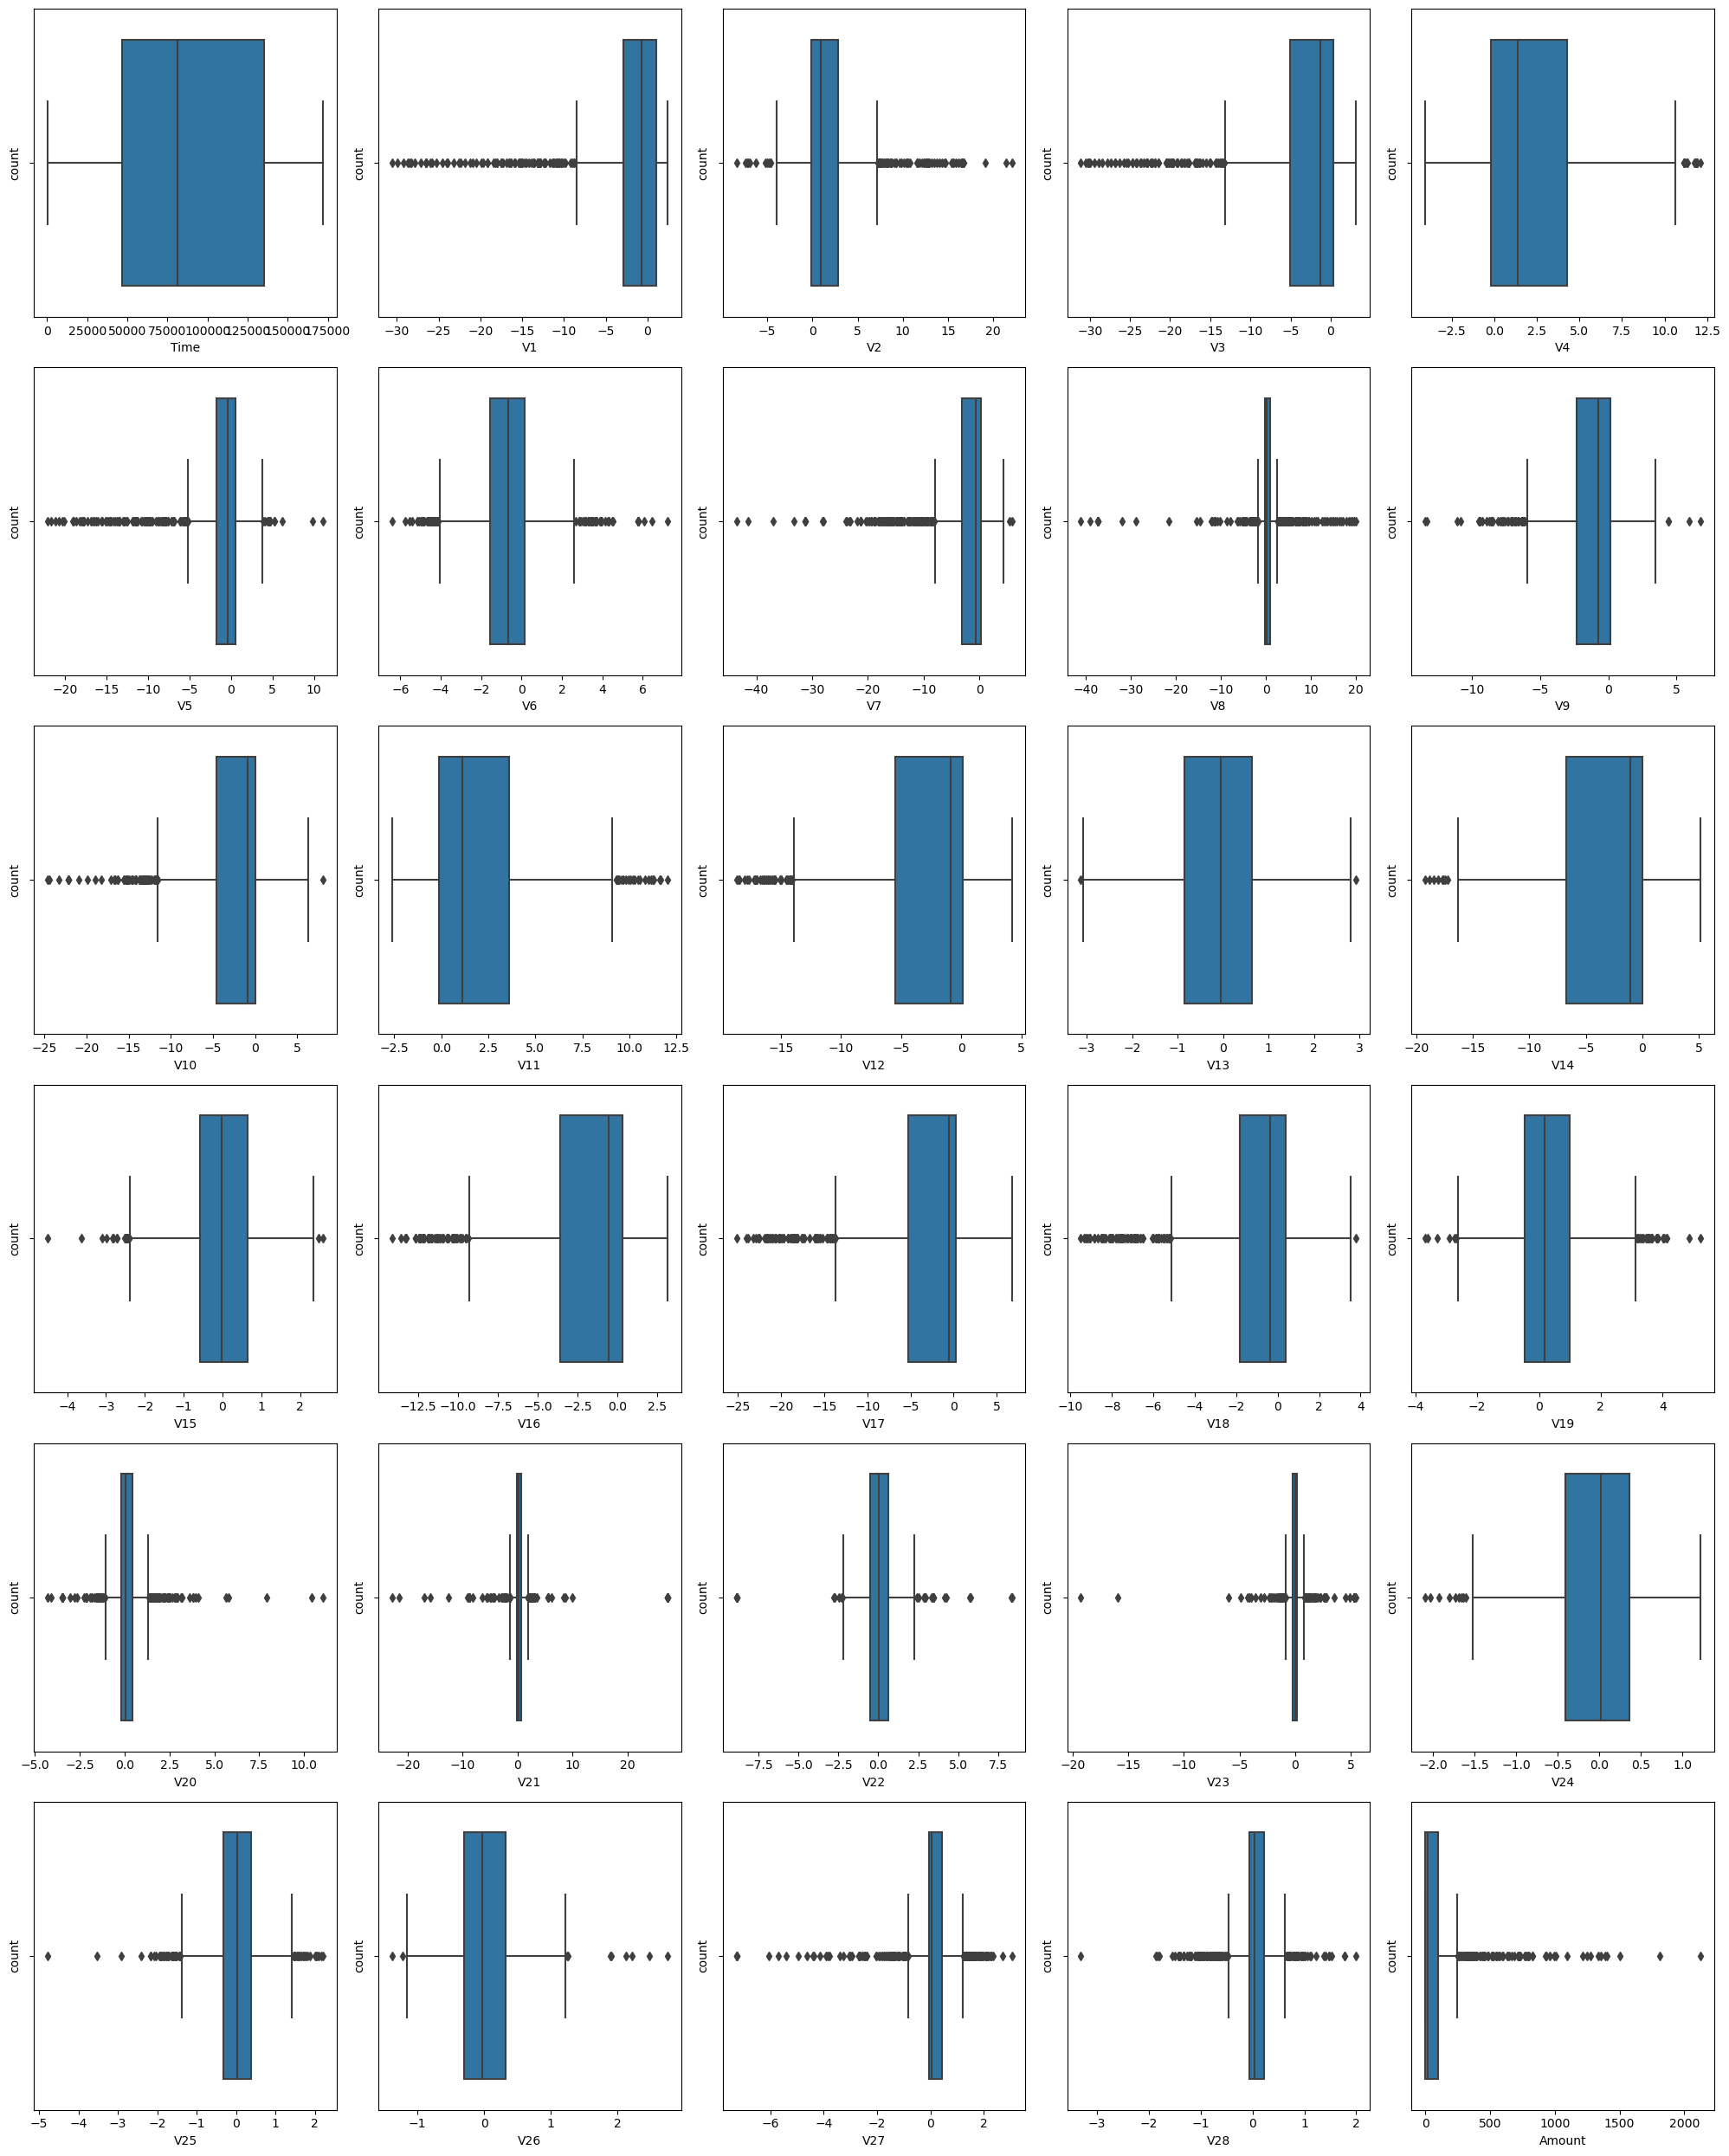

In [72]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data.drop("Class",axis=1):
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()  

In [73]:
# handle in outliers
plotnumber=1
for column in data :
    if plotnumber<=31:
        #find Q1 & Q3
        Q1=data[column].quantile(0.25)
        print('lower quartile',Q1)
        Q3=data[column].quantile(0.75)
        print('upper quartile',Q3)
        #finding interquartile range
        IQR=Q3-Q1
        IQR
        #find lower limit and upper limit
        lower_limit=Q1-1.5*IQR
        print('lower_limit',lower_limit)
        upper_limit=Q3+1.5*IQR
        print('upper_limit:',upper_limit)
        #find values above upper_limit & lower_limit
        print(data.loc[data[column]>upper_limit])
        print(data.loc[data[column]<lower_limit])
        data.loc[data[column]>upper_limit,column]=data[column].median()
        data.loc[data[column]<lower_limit,column]=data[column].median()
    plotnumber+=1

lower quartile 46693.75
upper quartile 135498.5
lower_limit -86513.375
upper_limit: 268705.625
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]
lower quartile -2.840567659286952
upper quartile 1.0742938382507499
lower_limit -8.712859905593504
upper_limit: 6.946586084557302
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]
            Time         V1         V2         V3         V4         V5  \
10690    18088.0 -12.224021   3.854150 -12.466766   9.648311  -2.72

lower quartile -0.45863242626367473
upper quartile 0.98429643309708
lower_limit -2.6230257153048067
upper_limit: 3.148689722138212
            Time        V1        V2         V3        V4        V5        V6  \
8335     11131.0 -1.426623  4.141986  -9.804103  6.666273 -4.749527 -2.073129   
30473    35942.0 -4.194074  4.382897  -5.118363  4.455230 -4.812621 -1.224645   
42528    41138.0 -4.595617  5.083690  -7.581015  7.546033 -0.442087 -1.729185   
42590    41164.0 -5.932778  4.571743  -9.427247  6.577056 -0.442087 -3.661798   
42635    41181.0 -7.334341  4.960892  -8.451410  8.174825 -0.442087 -2.382711   
42674    41194.0 -7.896886  5.381020  -8.451162  7.963928 -0.442087 -2.376820   
42696    41203.0 -8.426814  6.241659  -9.946470  8.199614 -0.442087 -2.522046   
42700    41204.0 -8.440284  6.147653 -11.683706  6.702780 -0.442087 -3.716264   
42784    41243.0 -0.701193  6.261586  -1.304683  7.183602 -0.442087 -3.860820   
42887    41285.0 -0.701193  6.574615 -12.788462  8.786257 -

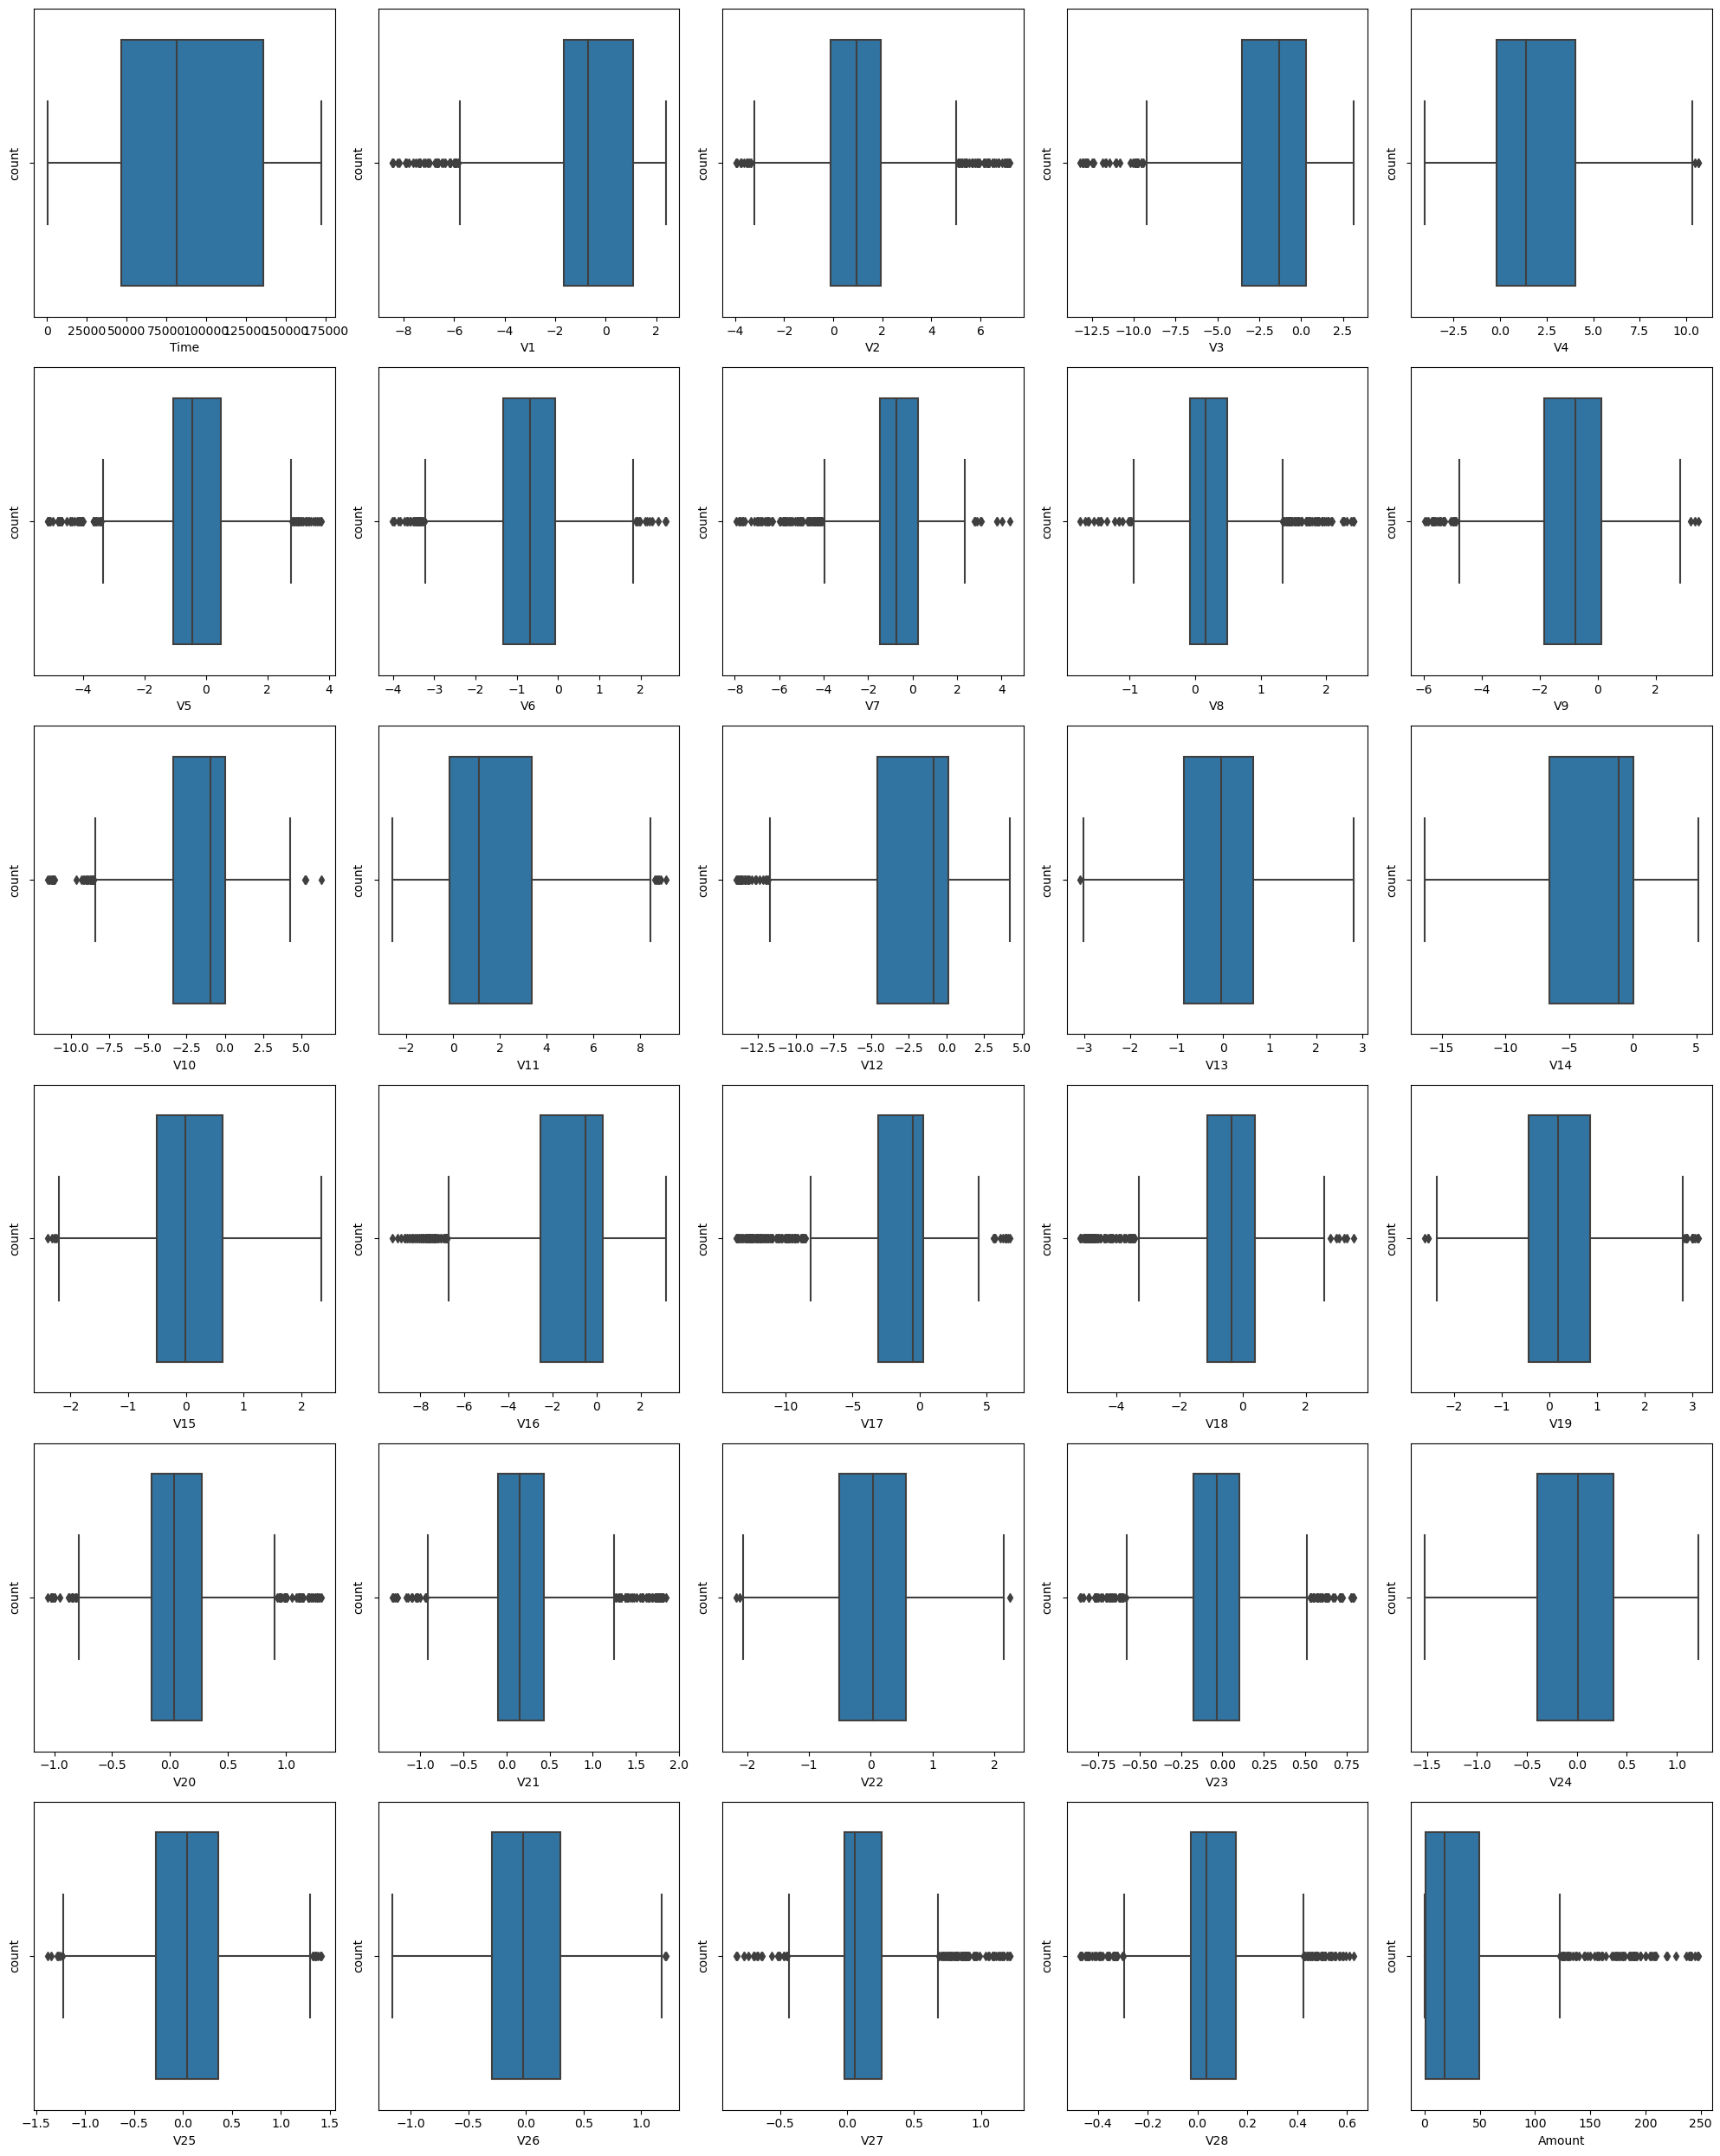

In [74]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data.drop("Class",axis=1):
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()  

In [75]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.164630,-0.141790,-0.052675,-0.185337,0.217811,0.089287,0.099792,-0.060753,0.104806,...,-0.082475,0.127361,0.129354,0.014765,-0.223874,-0.038437,-0.054007,-0.106116,-0.007055,-0.166350
V1,0.164630,1.000000,-0.446999,0.426683,-0.367226,0.325841,0.265601,0.490394,-0.260679,0.364241,...,-0.310387,-0.071103,-0.027084,0.014600,0.063993,-0.048601,-0.238062,-0.145163,-0.055901,-0.420871
V2,-0.141790,-0.446999,1.000000,-0.634426,0.618753,-0.160988,-0.462904,-0.394532,0.229272,-0.506554,...,0.247993,-0.040590,-0.008302,-0.017871,0.024195,0.146165,0.314729,0.215665,-0.140820,0.521163
V3,-0.052675,0.426683,-0.634426,1.000000,-0.606154,0.293766,0.554784,0.503864,-0.277866,0.516284,...,-0.369549,0.004726,-0.055018,0.132462,-0.063831,-0.182946,-0.340539,-0.224224,0.045066,-0.622307
V4,-0.185337,-0.367226,0.618753,-0.606154,1.000000,-0.210589,-0.414862,-0.386044,0.248041,-0.651649,...,0.371067,-0.047272,-0.054742,-0.053862,0.026252,0.165331,0.265247,0.247602,-0.050493,0.702606
V5,0.217811,0.325841,-0.160988,0.293766,-0.210589,1.000000,0.006126,0.449818,-0.258154,0.262932,...,-0.338299,-0.127313,-0.128883,0.071194,0.031007,-0.037731,-0.132661,-0.038706,-0.145474,-0.279292
V6,0.089287,0.265601,-0.462904,0.554784,-0.414862,0.006126,1.000000,0.285687,-0.113758,0.393465,...,-0.246455,0.075546,0.048856,-0.080857,-0.106855,-0.092032,-0.199671,-0.183082,0.094055,-0.418576
V7,0.099792,0.490394,-0.394532,0.503864,-0.386044,0.449818,0.285687,1.000000,-0.469265,0.396074,...,-0.429338,-0.027372,-0.035301,0.132356,-0.033519,-0.125141,-0.370367,-0.197278,-0.038089,-0.464058
V8,-0.060753,-0.260679,0.229272,-0.277866,0.248041,-0.258154,-0.113758,-0.469265,1.000000,-0.287479,...,0.316434,0.014372,0.025804,-0.116423,0.010086,0.121789,0.308365,0.133466,0.018123,0.260135
V9,0.104806,0.364241,-0.506554,0.516284,-0.651649,0.262932,0.393465,0.396074,-0.287479,1.000000,...,-0.383496,0.033258,0.103672,0.093652,-0.094156,-0.182254,-0.291503,-0.271264,-0.017427,-0.530129


<Axes: >

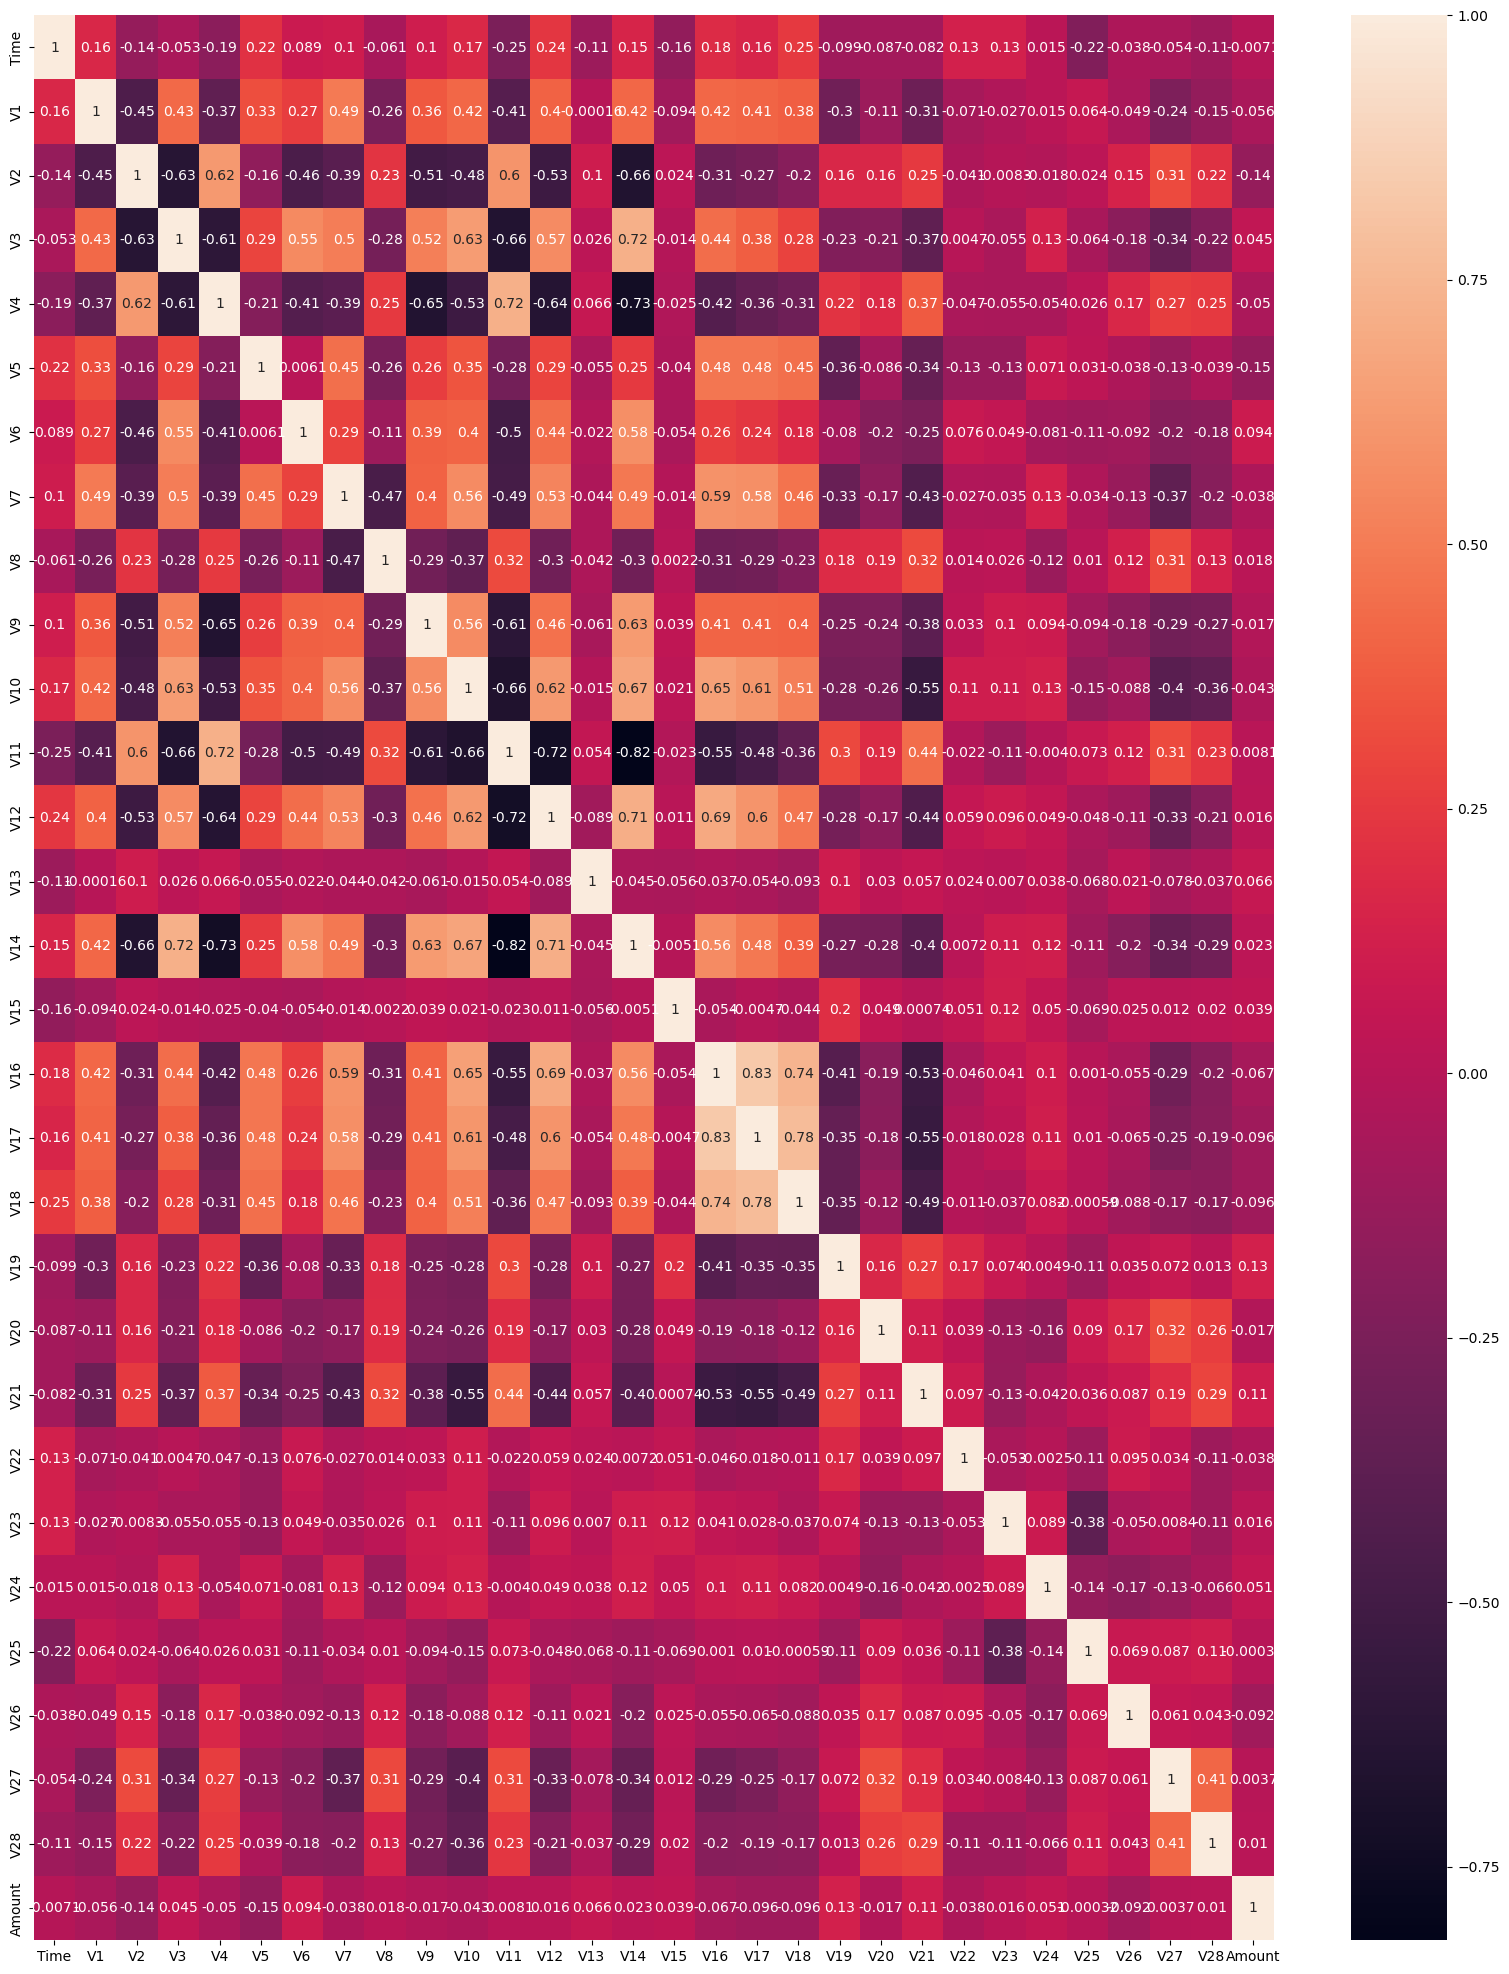

In [76]:
plt.figure(figsize=(20,25),facecolor="white")
sns.heatmap(data.drop("Class",axis=1).corr(),annot=True)

In [77]:
# split data into x and y
x=data.drop("Class",axis=1)
y=data[["Class"]]

In [78]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
264876,161635.0,-1.042437,-1.502482,0.163939,-0.460260,-0.488177,0.233567,1.247327,0.015091,0.727813,...,0.946367,0.656634,1.142560,-0.031389,0.591115,-1.094987,-0.133796,0.125830,0.332908,17.99
143993,85782.0,1.072550,-0.108377,0.385924,0.569751,-0.469908,-0.380412,-0.098717,0.124727,-0.009635,...,-0.138196,-0.100877,-0.470713,0.100789,0.187167,0.114485,0.173546,-0.042066,0.008399,49.99
87248,61600.0,-0.762073,-3.542133,0.058367,0.974639,-1.734559,1.241091,0.320794,0.269805,0.837678,...,0.038042,0.444737,-0.615781,-0.702926,-0.182934,-0.405483,0.853050,-0.185248,0.162542,17.99
118555,75125.0,0.824879,-0.543307,1.163464,1.390929,-1.024663,0.429259,-0.643908,0.369075,0.591516,...,0.020986,0.279161,0.641504,-0.142795,0.216499,0.292635,-0.252136,0.050112,0.043657,130.00
1019,769.0,1.293730,0.649219,-0.928314,0.618256,0.784614,-0.487383,0.374360,-0.175528,-0.245819,...,-0.018790,-0.171402,-0.354259,-0.168067,-0.854451,0.639476,0.447704,-0.009582,0.032835,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,17.99
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [79]:
y

,Class
264876,0.0
143993,0.0
87248,0.0
118555,0.0
1019,0.0
...,...
279863,1.0
280143,1.0
280149,1.0
281144,1.0


In [80]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [81]:
x_train.shape

(688, 30)

In [82]:
y_train.shape

(688, 1)

In [83]:
x_test.shape

(296, 30)

In [84]:
y_test.shape

(296, 1)

# Apply Logistic Regression

In [86]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression

In [87]:
# initialize the model
model=LogisticRegression()

In [88]:
# train model with x_train,y_train
model.fit(x_train,y_train)

C:\Users\borka\ Swapnil\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\borka\ Swapnil\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred=model.predict(x_test)
y_pred

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0.

In [90]:
df=y_test.copy()

In [91]:
df["y_pred"]=y_pred

In [92]:
df

,Class,y_pred
27076,0.0,0.0
120837,1.0,1.0
123112,0.0,0.0
77682,1.0,1.0
69508,0.0,0.0
...,...,...
158909,0.0,0.0
230076,1.0,1.0
106113,0.0,0.0
190927,0.0,0.0


# Evaluate the model

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [94]:
confusion_matrix(y_test,y_pred)

array([[148,   9],
       [ 12, 127]], dtype=int64)

In [95]:
accuracy_score(y_test,y_pred)

0.9290540540540541

In [96]:
precision_score(y_test,y_pred)

0.9338235294117647

In [97]:
recall_score(y_test,y_pred)

0.9136690647482014

In [98]:
f1_score(y_test,y_pred)

0.9236363636363636

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       157
         1.0       0.93      0.91      0.92       139

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [100]:
# ROC-AUC method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.9281721119919352
